In [1]:
import pandas as pd

# Data van https://www.kaggle.com/christianlillelund/csgo-round-winner-classification
round_data = pd.read_csv('data/csgo_round_snapshots.csv')

In [2]:
round_data.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [5]:
round_data.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [6]:
round_small = round_data[['ct_players_alive', 't_players_alive', 'map', 'round_winner']]

## Using just ct players alive
### What is the win pct for CT when 2 ct are alive

In [9]:
def win_pct(dat, goal='CT'):
    vc = dat.value_counts()
    try:
        return vc[goal] / vc.sum()
    except KeyError:
        return 0

round_small.groupby('ct_players_alive')['round_winner'].agg(win_pct, goal='CT')

NameError: name 'round_small' is not defined

In [8]:
round_small.groupby('ct_players_alive')['round_winner'].agg(win_pct, goal='T')

ct_players_alive
0.0    1.000000
1.0    0.877268
2.0    0.716951
3.0    0.575905
4.0    0.468774
5.0    0.456375
Name: round_winner, dtype: float64

In [9]:
0.531226 + 0.468774

1.0

\begin{equation}
P(A|B) = \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|\neg A)P(\neg A)} = P(\text{win}|\text{2 alive}) = \frac{P(\text{2 alive}|\text{win})P(\text{win})}{P(\text{2 alive}|\text{win})P(\text{win}) + P(\text{2 alive}|\text{lose})P(\text{lose})}
\end{equation}

In [10]:
P_2alive_win = round_small.query('ct_players_alive == 2')['round_winner'].agg(win_pct, goal='CT')
P_2alive_lose = round_small.query('ct_players_alive == 2')['round_winner'].agg(win_pct, goal='T')
P_CT_win = round_small['round_winner'].agg(win_pct, goal='CT')
P_CT_lose = round_small['round_winner'].agg(win_pct, goal='T')

In [11]:
P_2alive_win

0.2830485611510791

In [12]:
P_2alive_lose

0.7169514388489209

In [13]:
P_CT_win

0.4901887100727065

In [14]:
P_CT_lose

0.5098112899272935

In [5]:
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
    not_a = 1 - p_a
    p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
    p_a_given_b = (p_b_given_a * p_a) / p_b
    return p_a_given_b

bayes_theorem(P_CT_win, P_2alive_win, P_2alive_lose)

NameError: name 'P_CT_win' is not defined

## Also include the map that was played

In [16]:
round_data[['ct_players_alive', 'map', 'round_winner']].groupby(['map'])['round_winner'].agg(win_pct, goal='CT')

map
de_cache       0.710345
de_dust2       0.458725
de_inferno     0.453992
de_mirage      0.492248
de_nuke        0.536873
de_overpass    0.498970
de_train       0.541843
de_vertigo     0.470414
Name: round_winner, dtype: float64

In [17]:
round_data[['ct_players_alive', 'map', 'round_winner']].groupby(['map', 'ct_players_alive'])['round_winner'].agg(win_pct, goal='CT')

map          ct_players_alive
de_cache     1.0                 0.285714
             2.0                 0.625000
             3.0                 0.555556
             4.0                 0.678571
             5.0                 0.774194
de_dust2     1.0                 0.123857
             2.0                 0.268524
             3.0                 0.378675
             4.0                 0.483959
             5.0                 0.514533
de_inferno   0.0                 0.000000
             1.0                 0.109694
             2.0                 0.204082
             3.0                 0.372447
             4.0                 0.496686
             5.0                 0.511125
de_mirage    1.0                 0.121857
             2.0                 0.299315
             3.0                 0.433293
             4.0                 0.533728
             5.0                 0.544257
de_nuke      1.0                 0.123711
             2.0                 0.349731
    

This confirms that the priors per map are different. Without any additional information the win pct are very different. For example, knowing there are 2 CT players alive on cache:

We can include the map explictely in our Bayes equation:

\begin{equation}
P(C|A,B) = \frac{P(A|C)P(B|C)P(C)}{P(A|C)P(B|C)P(C) + P(A|\neg C)P(B|\neg C)P(\neg C)} = P(\text{win}|\text{2 alive}, \text{map de_cache}) = \frac{P(\text{2 alive}|\text{win})P(\text{map de_cache}|\text{win})P(\text{win})}{P(\text{2 alive}|\text{win})P(\text{map de_cache}|\text{win})P(\text{win}) + P(\text{2 alive}|\text{lose})P(\text{map de_cache}|\text{lose})P(\text{lose})}
\end{equation}

Under the assumption that the events `2 alive` and `map de_cache` are conditionally independent. This makes it a Naive Bayes approach. In code:

In [6]:
cur_map = "de_cache"
no_players = 2
P_2alive_win = round_small.query(f'ct_players_alive == {no_players}')['round_winner'].agg(win_pct, goal='CT')
P_2alive_lose = round_small.query(f'ct_players_alive == {no_players}')['round_winner'].agg(win_pct, goal='T')
P_map_win = round_small.query(f'map == "{cur_map}"')['round_winner'].agg(win_pct, goal='CT')
P_map_lose = round_small.query(f'map == "{cur_map}"')['round_winner'].agg(win_pct, goal='T')
P_CT_win = round_small['round_winner'].agg(win_pct, goal='CT')
P_CT_lose = round_small['round_winner'].agg(win_pct, goal='T')
print(pd.Series([P_2alive_win, P_2alive_lose, P_map_win, P_map_lose, P_CT_win, P_CT_lose], 
                index = ['P_2alive_win', 'P_2alive_lose', 'P_map_win', 'P_map_lose', 'P_CT_win', 'P_CT_lose']))

bayes_theorem(P_CT_win, P_2alive_win * P_map_win, P_2alive_lose * P_map_lose)

NameError: name 'round_small' is not defined

## And adding the amount of T players alive
The issue here is that we want to extend our system to include multiple pieces of evidence. 

In [7]:
cur_map = "de_cache"
no_ct_players = 2
no_t_players = 0
P_2alive_win = round_small.query(f'ct_players_alive == {no_ct_players}')['round_winner'].agg(win_pct, goal='CT')
P_2alive_lose = round_small.query(f'ct_players_alive == {no_ct_players}')['round_winner'].agg(win_pct, goal='T')
P_T2alive_win = round_small.query(f't_players_alive == {no_t_players}')['round_winner'].agg(win_pct, goal='CT')
P_T2alive_lose = round_small.query(f't_players_alive == {no_t_players}')['round_winner'].agg(win_pct, goal='T')
P_map_win = round_small.query(f'map == "{cur_map}"')['round_winner'].agg(win_pct, goal='CT')
P_map_lose = round_small.query(f'map == "{cur_map}"')['round_winner'].agg(win_pct, goal='T')
P_CT_win = round_small['round_winner'].agg(win_pct, goal='CT')
P_CT_lose = round_small['round_winner'].agg(win_pct, goal='T')
print(pd.Series([P_2alive_win, P_2alive_lose, P_map_win, P_map_lose, P_CT_win, P_CT_lose], 
                index = ['P_2alive_win', 'P_2alive_lose', 'P_map_win', 'P_map_lose', 'P_CT_win', 'P_CT_lose']))

bayes_theorem(P_CT_win, P_2alive_win * P_map_win * P_T2alive_win, P_2alive_lose * P_map_lose * P_T2alive_lose)

NameError: name 'round_small' is not defined

# Improving the code

In [18]:
import numbers

def get_winpct_from_data(dat, goal):
    return dat.agg(win_pct, goal=goal)

def calc_prob(var, value, goal):
    if isinstance(value, str):
        return get_winpct_from_data(round_data.query(f'{var} == "{value}"')['round_winner'], goal)
    else:
        return get_winpct_from_data(round_data.query(f'{var} == {value}')['round_winner'], goal)
    
def calc_marginal_probs(evidence, goal):
    return pd.Series([calc_prob(var, value, goal) for var, value in evidence.items()]).product()

evidence = {'ct_players_alive': 2, 't_players_alive': 0, 'map': 'de_cache', 'bomb_planted': True}
bayes_theorem(get_winpct_from_data(round_data['round_winner'], 'CT'), 
              calc_marginal_probs(evidence, 'CT'), 
              calc_marginal_probs(evidence, 'T'))

0.8413945394834728

# 1v1 before and after bomb plant

In [13]:
evidence = {'ct_players_alive': 1, 't_players_alive': 1, 'bomb_planted': True}
p1 = bayes_theorem(get_winpct_from_data(round_data['round_winner'], 'CT'), 
              calc_marginal_probs(evidence, 'CT'), 
              calc_marginal_probs(evidence, 'T'))
evidence = {'ct_players_alive': 1, 't_players_alive': 1, 'bomb_planted': False}
p2 = bayes_theorem(get_winpct_from_data(round_data['round_winner'], 'CT'), 
              calc_marginal_probs(evidence, 'CT'), 
              calc_marginal_probs(evidence, 'T'))
print(p1, p2)

0.18097289849730794 0.45306912812458766


# Add round score (how late in the game)

In [164]:
pd.cut(round_data['ct_score'], [-1,4,8,12,16,max(round_data['ct_score'])]).unique()

[(-1.0, 4.0], (4.0, 8.0], (8.0, 12.0], (12.0, 16.0], (16.0, 32.0]]
Categories (5, interval[float64]): [(-1.0, 4.0] < (4.0, 8.0] < (8.0, 12.0] < (12.0, 16.0] < (16.0, 32.0]]

In [165]:
# Choosing no labels for selection later
#round_data['ct_score_cat'] = pd.cut(round_data['ct_score'], 6, labels=False)
round_data['ct_score_cat'] = pd.cut(round_data['ct_score'], [-1,4,8,12,16,max(round_data['ct_score'])], labels=False)
round_data['ct_score_cat'].unique()

array([0, 1, 2, 3, 4])

In [19]:
def prob_helper(evidence):
    dummy = evidence.copy()
    dummy['prob'] = bayes_theorem(get_winpct_from_data(round_data['round_winner'], 'CT'), 
                          calc_marginal_probs(evidence, 'CT'), 
                          calc_marginal_probs(evidence, 'T'))
    return pd.DataFrame(dummy, index=[0])

P_win = pd.concat([prob_helper({'ct_players_alive': ct_player, 't_players_alive': t_player, 
                                'map': map_name, 'bomb_planted': bomb_planted}) 
                   for ct_player in range(0,6) 
                   for t_player in range(0,6)
                   for map_name in round_data['map'].unique()
                   for bomb_planted in round_data['bomb_planted'].unique()])

In [33]:
P_win.query('ct_players_alive==1 and t_players_alive==1')

,ct_players_alive,t_players_alive,map,bomb_planted,prob
0,1,1,de_dust2,False,0.412472
0,1,1,de_dust2,True,0.157726
0,1,1,de_mirage,False,0.445397
0,1,1,de_mirage,True,0.176422
0,1,1,de_nuke,False,0.489872
0,1,1,de_nuke,True,0.203914
0,1,1,de_inferno,False,0.407857
0,1,1,de_inferno,True,0.155208
0,1,1,de_overpass,False,0.452049
0,1,1,de_overpass,True,0.180363


In [58]:
plot_data = P_win.pivot(index=['ct_players_alive', 't_players_alive', 'map'], columns='bomb_planted', values='prob')
plot_data.columns = ['Bomb_not_planted', 'Bomb_planted']
plot_data['plant_diff'] = plot_data['Bomb_planted'] - plot_data['Bomb_not_planted']

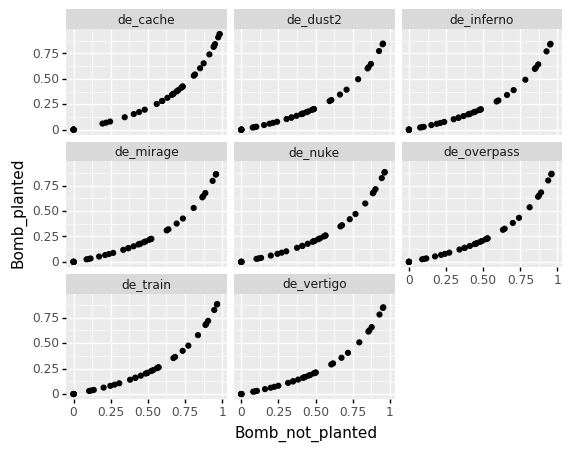

<ggplot: (8794069306787)>

In [59]:
(
    ggplot(plot_data.reset_index()) + 
      geom_point(aes(x='Bomb_not_planted', y='Bomb_planted')) + facet_wrap('~ map')
)

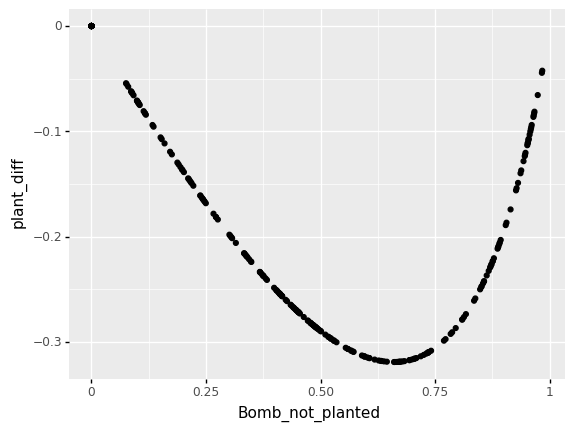

<ggplot: (8794068026865)>

In [63]:
(
    ggplot(plot_data.reset_index()) + 
      geom_point(aes(x='Bomb_not_planted', y='plant_diff')) 
)

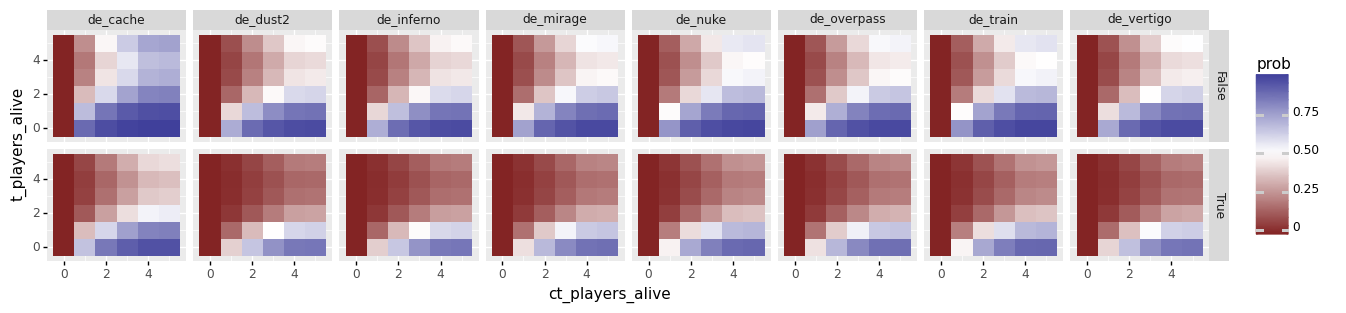

<ggplot: (8794069967728)>

In [31]:
from plotnine import *

(
    ggplot(P_win, aes(x='ct_players_alive', y='t_players_alive')) + 
      geom_tile(aes(fill='prob')) + 
      facet_grid('bomb_planted ~ map') + 
      scale_fill_gradient2(midpoint=0.5) + theme(figure_size=(15,3))
)

# Next steps
- Add more vars. In the current framework for non-discrete vars this means discritizing the vars.
- Extending beyond conditionally independent. For example using a Bayesian Belief Network. 